In [1]:
from JHProgress import JHProgress
from JHProgress_tsf import TSF
from JHProgress_portopt import PortOPT
import pandas as pd
import numpy as np
import yaml
import warnings
import joblib
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

c:\Users\palaj\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open("config.yaml","r") as f:
    config = yaml.safe_load(f)

# Obtencion de datos

In [3]:
'''
jhp=JHProgress()
jhp.cargar_fundamentales()#Scrapping","de","la","SEC
jhp.guardar_fundamentales_sql()#Guardar","en","SQL
prices=jhp.descargar_precios_yahoo(config['Tiempo']['Inicio'],config['Tiempo']['Fin'])
fundamentales=jhp.cargar_fundamentales_sql()
jhp.guardar_precios_fundamentales_sql()
'''

'\njhp=JHProgress()\njhp.cargar_fundamentales()#Scrapping","de","la","SEC\njhp.guardar_fundamentales_sql()#Guardar","en","SQL\nprices=jhp.descargar_precios_yahoo(config[\'Tiempo\'][\'Inicio\'],config[\'Tiempo\'][\'Fin\'])\nfundamentales=jhp.cargar_fundamentales_sql()\njhp.guardar_precios_fundamentales_sql()\n'

# Forecasting

In [4]:
'''
tsf=TSF()
tsf.entrenar_modelos()
#tsf.hyper_tunning('NVDA')


result_df=pd.DataFrame()
for sym in config['Simbolos']:
    df=tsf.inferencia(sym)
    result_df=pd.concat([df,result_df])


tsf.guardar_sql(result_df,'TablaPredicciones')
'''

"\ntsf=TSF()\ntsf.entrenar_modelos()\n#tsf.hyper_tunning('NVDA')\n\n\nresult_df=pd.DataFrame()\nfor sym in config['Simbolos']:\n    df=tsf.inferencia(sym)\n    result_df=pd.concat([df,result_df])\n\n\ntsf.guardar_sql(result_df,'TablaPredicciones')\n"

In [5]:
#result_df[result_df['Simbolo']=='FICO'][['target','Predicted_Returns']].plot()

# Ajuste de portafolio

2025-12-20 16:38:07,264 - INFO - Tickers downloaded successfully
[*********************100%***********************]  14 of 14 completed
2025-12-20 16:38:11,847 - INFO - DataFrame desde la tabla VW_FORECAST_PRICE cargado exitosamente
2025-12-20 16:38:11,875 - INFO - Entrenando los pesos desde: 2019-01-06 00:00:00, hasta 2024-01-07 00:00:00
2025-12-20 16:38:11,878 - INFO - Validando los pesos desde: 2024-01-07 00:00:00, hasta 2026-12-27 00:00:00
2025-12-20 16:38:11,890 - INFO - Valid score generado : 2.9691464767389473, con R: 1.6255603586620873 y target:1.485284052019165
2025-12-20 16:38:11,901 - INFO - Valid score generado : 2.937815682571517, con R: 1.6273486196391853 y target:1.485284052019165
2025-12-20 16:38:11,907 - INFO - Valid score generado : 2.3519941485022335, con R: 1.3740081454910211 y target:1.485284052019165
2025-12-20 16:38:11,915 - INFO - Valid score generado : 2.5558700674111945, con R: 1.6318528417848863 y target:1.485284052019165
2025-12-20 16:38:11,922 - INFO - Vali

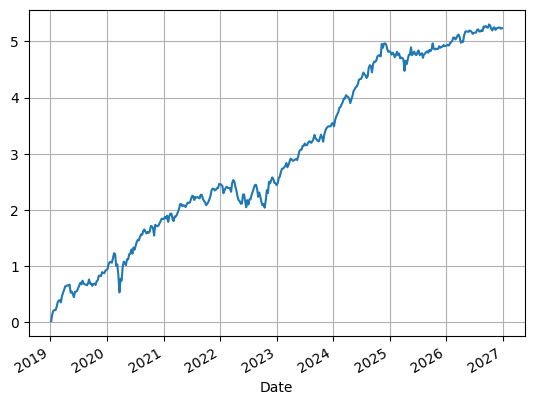

In [6]:
popt=PortOPT()
w,f=popt.obtener_pesos_cartera()
popt.visualizar_historico()
vm=popt.crear_cartera(51775)

In [7]:
#ef=popt.efficient_frontier()

In [8]:
vm

,0,cash,w
AAPL,10549.793131,-51774.999853,0.203762
CORT,1290.913017,-51774.999853,0.024933
CPRX,6781.673064,-51774.999853,0.130984
FICO,16774.740999,-51774.999853,0.323993
NVDA,25814.056837,-51774.999853,0.498581
PGR,28520.133670,-51774.999853,0.550848
TPL,2936.729292,-51774.999853,0.056721
TSLA,1413.311825,-51774.999853,0.027297
USLM,9468.648019,-51774.999853,0.182881


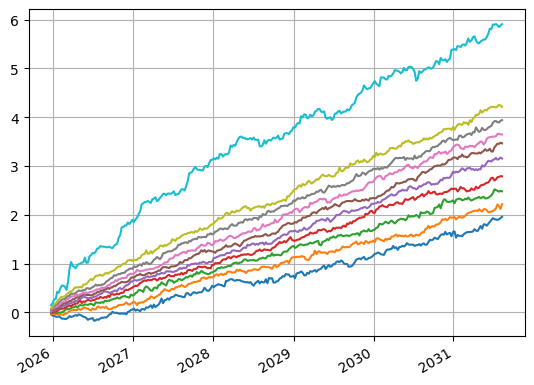

In [9]:
ports=popt.simulacion_montecarlo(100)

for i in range(1,11):
    ports.quantile(i/10,axis=1).plot(subplots=False)
plt.grid()

In [10]:
ports.mean(axis=1)

2025-12-21 16:38:12.512149    0.018501
2025-12-28 16:38:12.512149    0.028557
2026-01-04 16:38:12.512149    0.044704
2026-01-11 16:38:12.512149    0.054180
2026-01-18 16:38:12.512149    0.067836
                                ...   
2031-07-13 16:38:12.512149    3.053012
2031-07-20 16:38:12.512149    3.065042
2031-07-27 16:38:12.512149    3.065026
2031-08-03 16:38:12.512149    3.076004
2031-08-10 16:38:12.512149    3.083368
Freq: W-SUN, Length: 295, dtype: float64